In [3]:
%load_ext iminizinc
%load_ext autoreload
%autoreload 2

from __future__ import print_function
from ipywidgets import interact, interactive, interactive_output, fixed, interact_manual, HBox, VBox, Output
from ipywidgets import IntSlider, IntText, FloatSlider, FloatText, IntRangeSlider, FloatRangeSlider
# import ipywidgets as widgets

from IPython.display import display
import IPython
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd
import numpy as np

from datetime import datetime
# import talib
import pandas_ta as ta
# from talib.abstract import *
from math import *
from collections import OrderedDict
# import vectorbt as vbt    
import json
from decimal import *
getcontext().prec = 6


import sys, os


# import mplfinance as mpf
%matplotlib inline

# plt.rcParams['lines.linewidth'] = 0.5 



<IPython.core.display.Javascript object>

MiniZinc to FlatZinc converter, version 2.7.6, build 905165378
Copyright (C) 2014-2023 Monash University, NICTA, Data61


In [1]:
principal = 300000  # Principal amount (£)
interest_rate = 0.06  # Annual interest rate (6%)
monthly_rate = interest_rate / 12  # Monthly interest rate

num_payments = 20 * 12  # Total number of payments (20 years * 12 months)
monthly_payment = (principal * monthly_rate) / (1 - (1 + monthly_rate) ** -num_payments)

remaining_balance = principal
amortization_table = []

for month in range(1, num_payments + 1):
    interest_payment = remaining_balance * monthly_rate
    capital_payment = monthly_payment - interest_payment
    remaining_balance -= capital_payment

    amortization_table.append({
        'Month': month,
        'Monthly Payment (£)': monthly_payment,
        'Interest Payment (£)': interest_payment,
        'Capital Payment (£)': capital_payment,
        'Remaining Balance (£)': remaining_balance
    })

# Print the amortization table
for entry in amortization_table:
    print(entry)


{'Month': 1, 'Monthly Payment (£)': 2149.293175434518, 'Interest Payment (£)': 1500.0, 'Capital Payment (£)': 649.2931754345182, 'Remaining Balance (£)': 299350.7068245655}
{'Month': 2, 'Monthly Payment (£)': 2149.293175434518, 'Interest Payment (£)': 1496.7535341228274, 'Capital Payment (£)': 652.5396413116907, 'Remaining Balance (£)': 298698.1671832538}
{'Month': 3, 'Monthly Payment (£)': 2149.293175434518, 'Interest Payment (£)': 1493.490835916269, 'Capital Payment (£)': 655.8023395182493, 'Remaining Balance (£)': 298042.36484373553}
{'Month': 4, 'Monthly Payment (£)': 2149.293175434518, 'Interest Payment (£)': 1490.2118242186777, 'Capital Payment (£)': 659.0813512158404, 'Remaining Balance (£)': 297383.2834925197}
{'Month': 5, 'Monthly Payment (£)': 2149.293175434518, 'Interest Payment (£)': 1486.9164174625985, 'Capital Payment (£)': 662.3767579719197, 'Remaining Balance (£)': 296720.90673454775}
{'Month': 6, 'Monthly Payment (£)': 2149.293175434518, 'Interest Payment (£)': 1483.60

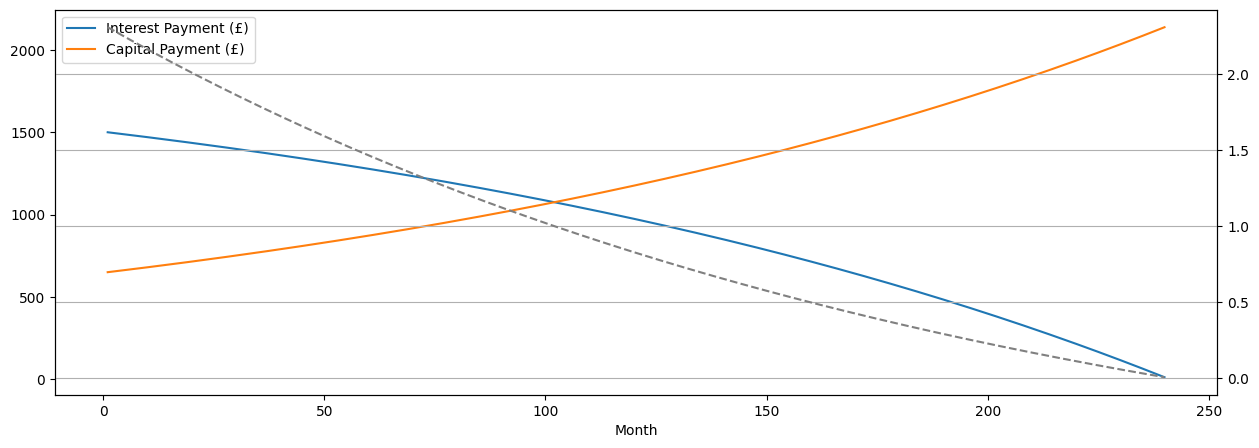

In [42]:
df = pd.DataFrame(amortization_table).set_index('Month')
# df.set_index(pd.PeriodIndex(df.Month, freq='M'))
df['int2princ'] = df['Interest Payment (£)'] / df['Capital Payment (£)']
# df.Month
# df.columns
# ax = df.iloc[:,:2].plot()
ax1 = df.iloc[:,[1,2]].plot(figsize=(15,5))
ax2 = ax1.twinx()
df.iloc[:, -1].plot(ax=ax2, figsize=(15,5), c='gray', linestyle='dashed')
plt.grid()
# df

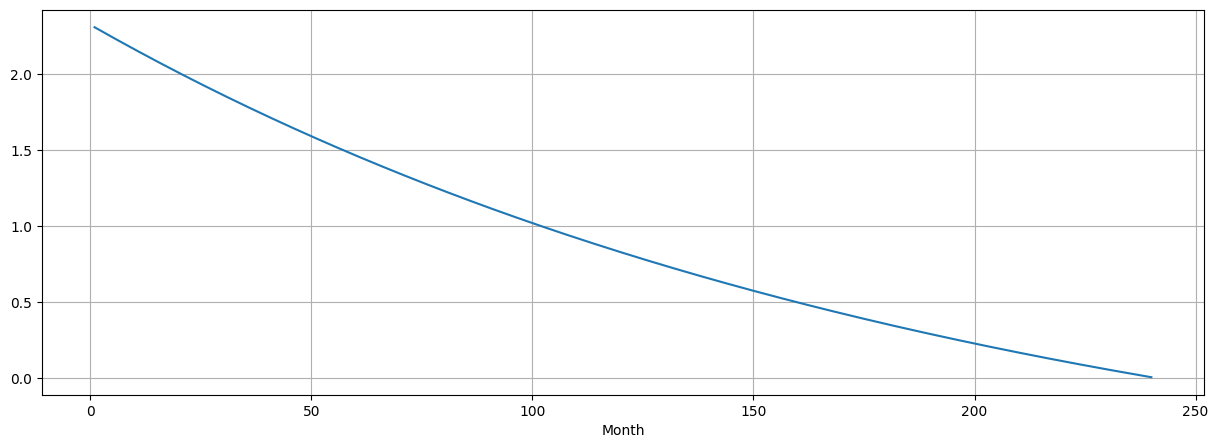

In [40]:
df.iloc[:, -1].plot(figsize=(15,5))
plt.grid()

In [48]:
principal = 300000  # Principal amount (£)
interest_rate = 0.06  # Annual interest rate (6%)
monthly_rate = interest_rate / 12  # Monthly interest rate

num_payments = 20 * 12  # Total number of payments (20 years * 12 months)
monthly_payment = (principal * monthly_rate) / (1 - (1 + monthly_rate) ** -num_payments)

remaining_balance = principal
amortization_table = []

monthly_overpayment = 3000  # Additional monthly overpayment (£)

for month in range(1, num_payments + 1):
    interest_payment = remaining_balance * monthly_rate
    capital_payment = monthly_payment - interest_payment
    remaining_balance -= capital_payment + monthly_overpayment

    amortization_table.append({
        'Month': month,
        'Monthly Payment (£)': monthly_payment + monthly_overpayment,
        'Interest Payment (£)': interest_payment,
        'Capital Payment (£)': capital_payment,
        'Remaining Balance (£)': remaining_balance
    })

# Print the amortization table
for entry in amortization_table:
    print(entry)

df = pd.DataFrame(amortization_table).set_index('Month')
# df.set_index(pd.PeriodIndex(df.Month, freq='M'))
df['int2princ'] = df['Interest Payment (£)'] / df['Capital Payment (£)']

{'Month': 1, 'Monthly Payment (£)': 5149.293175434518, 'Interest Payment (£)': 1500.0, 'Capital Payment (£)': 649.2931754345182, 'Remaining Balance (£)': 296350.7068245655}
{'Month': 2, 'Monthly Payment (£)': 5149.293175434518, 'Interest Payment (£)': 1481.7535341228274, 'Capital Payment (£)': 667.5396413116907, 'Remaining Balance (£)': 292683.1671832538}
{'Month': 3, 'Monthly Payment (£)': 5149.293175434518, 'Interest Payment (£)': 1463.415835916269, 'Capital Payment (£)': 685.8773395182491, 'Remaining Balance (£)': 288997.2898437356}
{'Month': 4, 'Monthly Payment (£)': 5149.293175434518, 'Interest Payment (£)': 1444.986449218678, 'Capital Payment (£)': 704.3067262158402, 'Remaining Balance (£)': 285292.98311751976}
{'Month': 5, 'Monthly Payment (£)': 5149.293175434518, 'Interest Payment (£)': 1426.4649155875989, 'Capital Payment (£)': 722.8282598469193, 'Remaining Balance (£)': 281570.15485767287}
{'Month': 6, 'Monthly Payment (£)': 5149.293175434518, 'Interest Payment (£)': 1407.850

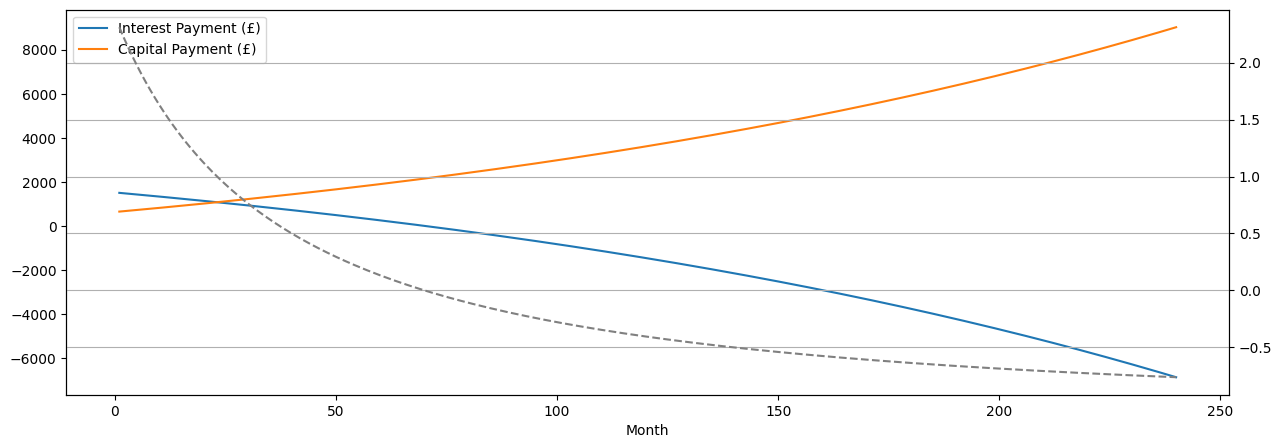

In [49]:
df = pd.DataFrame(amortization_table).set_index('Month')
# df.set_index(pd.PeriodIndex(df.Month, freq='M'))
df['int2princ'] = df['Interest Payment (£)'] / df['Capital Payment (£)']
# df.Month
# df.columns
# ax = df.iloc[:,:2].plot()
ax1 = df.iloc[:,[1,2]].plot(figsize=(15,5))
ax2 = ax1.twinx()
df.iloc[:, -1].plot(ax=ax2, figsize=(15,5), c='gray', linestyle='dashed')
plt.grid()

In [111]:
price = 450000
principal = price * 0.8  # Principal amount (£)
interest_rate = 0.06  # Annual interest rate (6%)
monthly_rate = interest_rate / 12  # Monthly interest rate

num_payments = 20 * 12  # Total number of payments (20 years * 12 months)
monthly_payment = (principal * monthly_rate) / (1 - (1 + monthly_rate) ** -num_payments)

remaining_balance = principal
amortization_table = []

monthly_overpayment = 5000  # Additional monthly overpayment (£)

lump_sum_payments = [
    # {'month': 6, 'amount': 50000},
    {'month': 6, 'amount': 60000},
    {'month': 24, 'amount': 180000},
    {'month': 36, 'amount': 12000},
    # {'month': 18, 'amount': 20000}
]

for month in range(1, num_payments + 1):
    interest_payment = remaining_balance * monthly_rate
    capital_payment = monthly_payment - interest_payment
    remaining_balance -= capital_payment + monthly_overpayment

    for lump_sum in lump_sum_payments:
        if month == lump_sum['month']:
            remaining_balance -= lump_sum['amount']

    amortization_table.append({
        'Month': month,
        'Monthly Payment (£)': monthly_payment + monthly_overpayment,
        'Interest Payment (£)': interest_payment,
        'Capital Payment (£)': capital_payment,
        'Lump Sum Payment (£)': sum(lump_sum['amount'] for lump_sum in lump_sum_payments if month >= lump_sum['month']),
        'Remaining Balance (£)': remaining_balance
    })

# Print the amortization table
for entry in amortization_table:
    print(entry)


{'Month': 1, 'Monthly Payment (£)': 7579.151810521422, 'Interest Payment (£)': 1800.0, 'Capital Payment (£)': 779.1518105214218, 'Lump Sum Payment (£)': 0, 'Remaining Balance (£)': 354220.84818947857}
{'Month': 2, 'Monthly Payment (£)': 7579.151810521422, 'Interest Payment (£)': 1771.1042409473928, 'Capital Payment (£)': 808.047569574029, 'Lump Sum Payment (£)': 0, 'Remaining Balance (£)': 348412.80061990453}
{'Month': 3, 'Monthly Payment (£)': 7579.151810521422, 'Interest Payment (£)': 1742.0640030995228, 'Capital Payment (£)': 837.087807421899, 'Lump Sum Payment (£)': 0, 'Remaining Balance (£)': 342575.7128124826}
{'Month': 4, 'Monthly Payment (£)': 7579.151810521422, 'Interest Payment (£)': 1712.878564062413, 'Capital Payment (£)': 866.2732464590088, 'Lump Sum Payment (£)': 0, 'Remaining Balance (£)': 336709.4395660236}
{'Month': 5, 'Monthly Payment (£)': 7579.151810521422, 'Interest Payment (£)': 1683.547197830118, 'Capital Payment (£)': 895.6046126913038, 'Lump Sum Payment (£)': 0

<Axes: xlabel='Month'>

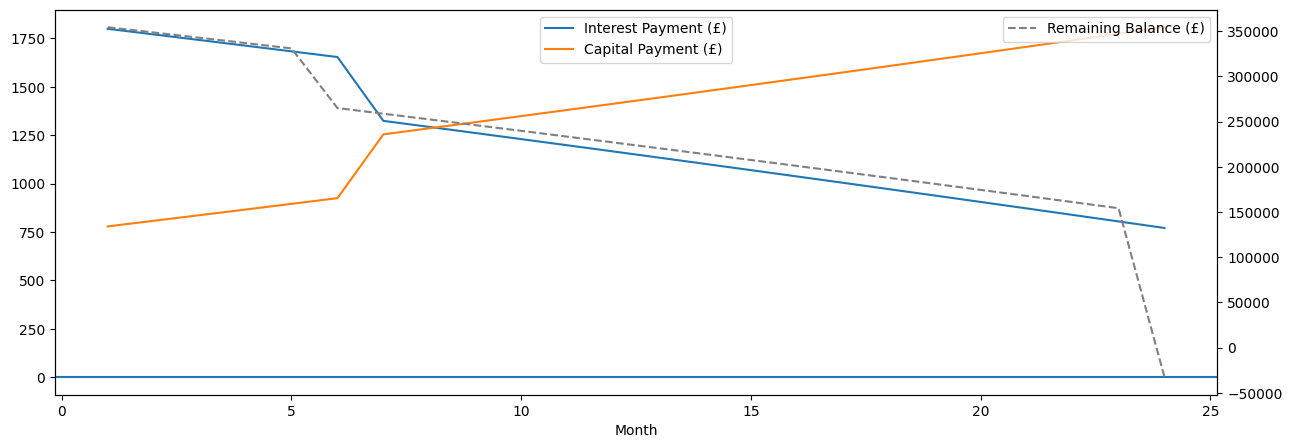

In [114]:
df = pd.DataFrame(amortization_table).set_index('Month').round(2)
# df.set_index(pd.PeriodIndex(df.Month, freq='M'))
df['int2princ'] = df['Interest Payment (£)'] / df['Capital Payment (£)']
df = df[df.int2princ > 0]
# df.Month
# df.columns
# ax = df.iloc[:,:2].plot()
ax1 = df.iloc[:,[1,2]].plot(figsize=(15,5))
ax2 = ax1.twinx()
# df.iloc[:, -1].plot(ax=ax2, figsize=(15,5), c='gray', linestyle='dashed')
ax1.axhline()
df.iloc[:, -2].plot(ax=ax2, figsize=(15,5), c='gray', linestyle='dashed', legend=True)
# plt.grid()

In [113]:
df.to_csv('mortgage.csv')

In [81]:
67/12


5.583333333333333

In [90]:
s = 450000 
np.array([s/5, 24000, 4000, 30000]).sum()

148000.0

In [93]:
6400*12

76800